# Excercise 5
## Neural Networks in Keras

Use keras framework to solve the below exercises.


In [4]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

## 5.1 Predict rating of a movie using Keras

**Exercise:** Use keras framework to predict rating.

In [5]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [12]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [7]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [8]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

## Data Precosessing

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

## Build Model

Create a neural network to predict the rating of a movie, calculate the testing set accuracy.

In [10]:
#!pip install keras==2.12.0

In [25]:
import gensim
from gensim.models import Word2Vec

In [9]:
#!pip install zeugma

In [2]:
from zeugma.embeddings import EmbeddingTransformer

In [3]:
glove_model = EmbeddingTransformer('glove')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [10]:
def aggregate_embeddings(doc_words, embeddings_model):
    doc_embeddings = embeddings_model.transform([' '.join(doc_words)])[0]
    # Calculate the mean embedding
    return np.mean(doc_embeddings, axis=0)

In [11]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, GRU, Dense
from sklearn.model_selection import train_test_split
import nltk
from gensim import models
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

# Custom preprocess function (if needed)
def preprocess(data):
   # Your text cleaning function here
   stop_words = set(stopwords.words('english'))
   data.translate(str.maketrans('', '', string.punctuation)).lower()
   [word for word in word_tokenize(data) if word.isalpha() and word not in stop_words]
   return data

X = plots.apply(preprocess).values

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

# Pad sequences
max_sequence_length = 100  # Choose an appropriate sequence length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, truncating='post')  # Truncate longer sequences

# Create embedding matrix
word_index = tokenizer.word_index
num_words = len(word_index) + 1
sample_embedding = glove_model.transform(['sample'])[0]
embedding_dim = len(sample_embedding)
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if word in glove_model.model.key_to_index:
        embedding_matrix[i] = glove_model.transform([word])[0]

X_train, X_test, y_train, y_test = train_test_split(np.array(padded_sequences), y, test_size=0.2, random_state=42)


# Define GRU model
model = Sequential()
model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
198/198 [==============================] - 59s 273ms/step - loss: 0.6950 - accuracy: 0.5182 - val_loss: 0.6853 - val_accuracy: 0.5636
Epoch 2/10
198/198 [==============================] - 52s 264ms/step - loss: 0.6877 - accuracy: 0.5413 - val_loss: 0.6830 - val_accuracy: 0.5541
Epoch 3/10
198/198 [==============================] - 54s 271ms/step - loss: 0.6855 - accuracy: 0.5507 - val_loss: 0.6834 - val_accuracy: 0.5706
Epoch 4/10
198/198 [==============================] - 53s 267ms/step - loss: 0.6838 - accuracy: 0.5532 - val_loss: 0.6779 - val_accuracy: 0.5738
Epoch 5/10
198/198 [==============================] - 55s 277ms/step - loss: 0.6797 - accuracy: 0.5698 - val_loss: 0.6767 - val_accuracy: 0.5725
Epoch 6/10
198/198 [==============================] - 65s 327ms/step - loss: 0.6703 - accuracy: 0.5842 - val_loss: 0.6691 - val_accuracy: 0.6029
Epoch 7/10
198/198 [==============================] - 53s 266ms/step - loss: 0.6650 - accuracy: 0.5963 - val_loss: 0.6722 - val_ac

# 5.2 Decision Boundary --  Moons Dataset

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

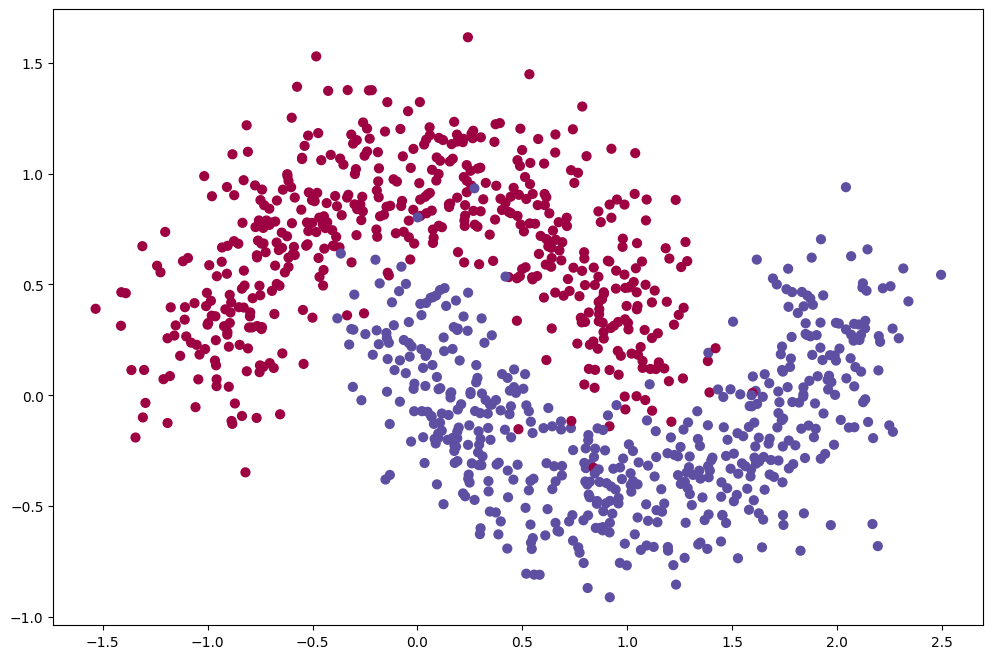

In [ ]:
# Create moons dataset.

from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

**Hint:** Use the next function to plt the decision boundary,

5560/5560 [==============================] - 9s 2ms/step


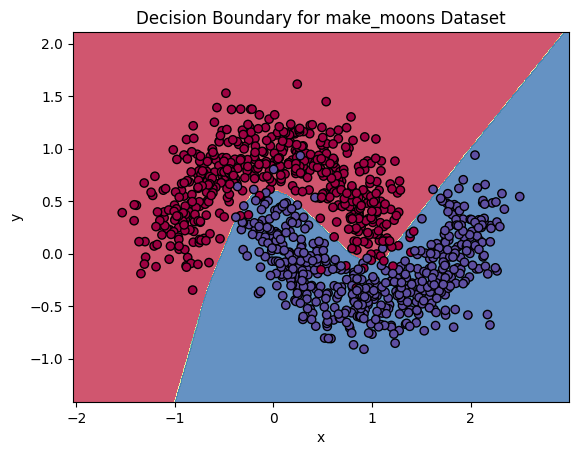

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense

# Crear el conjunto de datos make_moons
x_train, y_train = make_moons(n_samples=1000, noise=0.2, random_state=3)

# Definir el modelo
model = Sequential([
    Dense(32, input_dim=2, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Función para visualizar el límite de decisión
# Función para visualizar el límite de decisión
def plot_decision_boundary(model, X, y):
    # Rango de valores en los ejes x e y
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Generar una cuadrícula de puntos en el espacio de características bidimensionales
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Obtener probabilidades de las clases

    # Aplicar umbral para determinar las clases predichas
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    # Visualizar el límite de decisión
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary for make_moons Dataset')
    plt.show()

# Visualizar el límite de decisión
plot_decision_boundary(model, x_train, y_train)

